In [4]:
# !pip install mlxtend

In [5]:
from mlxtend.preprocessing import TransactionEncoder

In [6]:
import mlxtend
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [143]:
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [8]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '쥬스'],
    ['양상추', '맥주']
])

In [9]:
te=TransactionEncoder()

In [10]:
te_ary=te.fit(data)

In [11]:
te_ary = te.fit(data).transform(data)
te_ary

array([[ True, False, False,  True,  True],
       [ True,  True,  True, False, False],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False, False]])

In [12]:
df=pd.DataFrame(te_ary, columns=te.columns_)

In [13]:
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,False,True,True,True
3,False,True,True,False,False


In [14]:
from mlxtend.frequent_patterns import apriori

In [16]:
apriori(df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(쥬스, 기저귀)"
8,0.50,"(양상추, 맥주)"
9,0.50,"(쥬스, 우유)"


In [18]:
# 쥬스+우유를 함꼐 사 사람에게 추천을 해준다고 한다면, 맥주보다는 기저귀를 추천해야함
# 비지도 학습, 지지도 기반으로 판단

In [19]:
# one-hot 인코딩 방식의 테이블이 필요
# 실제로는 물건의 개수가 아주 많음

In [20]:
# ==> 0이 2차원 데이터: 희소행렬(sparse matrix)

In [21]:
# TF-IDF, CounterVectorizor, TransactionEncoder

In [23]:
# result에서 마지막 itemset 컬럼값 추출
# 쥬스, 우유와 함께 사면 좋을 것은?

In [32]:
result=apriori(df, min_support=0.5, use_colnames=True)

In [33]:
result

,support,itemsets
0,0.75,(기저귀)
1,0.50,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,(쥬스)
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 우유)"
7,0.50,"(쥬스, 기저귀)"
8,0.50,"(양상추, 맥주)"
9,0.50,"(쥬스, 우유)"


In [38]:
result.iloc[10,:]

support               0.5
itemsets    (쥬스, 기저귀, 우유)
Name: 10, dtype: object

In [40]:
# 기저귀와 함께 사면 좋음

### embedding - Word2Vec

In [46]:
# !pip install --user gensim

In [48]:
from gensim.models import Word2Vec

In [49]:
doc = [
    'you say goodbye and I say hello', 
    'i say happy or he said white',
    'we say unhappy and angry black'
]

In [50]:
doc2 = [
    '나는 굿바이라고 했고, 너는 헬로우라고 했어.', 
    '나는 기쁘다고 했고, 너는 하얗게 슬프다고 했어.',
    '우리는 행복하지 않고, 블랙으로 슬퍼'
]

In [51]:
# 문장을 토큰으로 끊어내기
sentences=[sentence.split(' ') for sentence in doc]

In [52]:
sentences

[['you', 'say', 'goodbye', 'and', 'I', 'say', 'hello'],
 ['i', 'say', 'happy', 'or', 'he', 'said', 'white'],
 ['we', 'say', 'unhappy', 'and', 'angry', 'black']]

In [53]:
sentences2=[sentence.split(' ') for sentence in doc2]

In [54]:
sentences2

[['나는', '굿바이라고', '했고,', '너는', '헬로우라고', '했어.'],
 ['나는', '기쁘다고', '했고,', '너는', '하얗게', '슬프다고', '했어.'],
 ['우리는', '행복하지', '않고,', '블랙으로', '슬퍼']]

In [63]:
model=Word2Vec(window=1, min_count=1)
# 특정한 단어의 앞 뒤 단어를 유추가능
# window: 유추하는 계산을 할 때 특정한 단어의 앞 뒤 몇 개를 가지고 계산을 할 지의 단위
# min-count :특정한 패턴의 출현 횟수

In [64]:
model.build_vocab(sentences) # 영문 문장을 가지고 계산을 함

In [65]:
# 특정한 단어를 주고 앞 뒤 단어를 추론해보자
model.wv.most_similar('say') # 비지도 학습
# say 단어 앞으로는 or가 나올 가능성이 제일 크고, say 뒤로는 and 단어가 나올 가능성이 제일 크다

[('or', 0.21617144346237183),
 ('hello', 0.0931011438369751),
 ('said', 0.09291724115610123),
 ('i', 0.07963485270738602),
 ('happy', 0.06285079568624496),
 ('you', 0.05433369055390358),
 ('he', 0.027057476341724396),
 ('white', 0.016134709119796753),
 ('and', -0.010839181020855904),
 ('unhappy', -0.02775038219988346)]

In [66]:
model2=Word2Vec(window=1, min_count=1)

In [67]:
model2.build_vocab(sentences2)

In [69]:
model2.wv.most_similar('너는')
# '너는' 단어 앞으로 나올 단어로는 '굿바이라고' 추천
# '너는' 단어 뒤로 나올 단어로는 '헬로우라고' 추천

[('굿바이라고', 0.13725270330905914),
 ('나는', 0.06797593832015991),
 ('우리는', 0.03364057466387749),
 ('블랙으로', 0.009391184896230698),
 ('기쁘다고', 0.008315940387547016),
 ('슬퍼', 0.004503006115555763),
 ('헬로우라고', -0.003644464071840048),
 ('했어.', -0.010839183814823627),
 ('했고,', -0.023671666160225868),
 ('슬프다고', -0.09575348347425461)]

### TF-IDF, 코사인 유사도

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [71]:
tfidf = TfidfVectorizer(stop_words='english')
# 불용어 처리 가능한 tfidf 객체 생성
tfidf_matrix = tfidf.fit_transform(doc) 
# 빈도수를 구하긴 하지만, 문서마다 너무 자주 등장하는 단어를 구분 단어로 사용하기엔 부적합하여, 가중치를 낮추어 계산
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (3, 9)


In [72]:
# 3x9에서 3은 문서의 개수, 9는 단어의 개수

In [77]:
print(tfidf_matrix.toarray())

[[0.         0.         0.54270061 0.         0.54270061 0.
  0.64105545 0.         0.        ]
 [0.         0.         0.         0.54645401 0.         0.54645401
  0.32274454 0.         0.54645401]
 [0.54645401 0.54645401 0.         0.         0.         0.
  0.32274454 0.54645401 0.        ]]


In [78]:
# 문서간의 유사도
cosine_similarity(tfidf_matrix, tfidf_matrix)
# 행 - 1, 2, 3  열 - 1, 2, 3
# 각 행, 열에 해당하는 문서의 유사도
# 문서1 + 문서2 = 0.20689715
# 문서1 + 문서3 = 0.20689715
# 문서2 + 문서3 = 0.10416404
# 문서2와 3은 유사하지 않다.

array([[1.        , 0.20689715, 0.20689715],
       [0.20689715, 1.        , 0.10416404],
       [0.20689715, 0.10416404, 1.        ]])

In [86]:
# 장바구니의 유사도
cart = [
    '우유 기저귀 쥬스',
    '양상추 기저귀 맥주',
    '우유 양상추 기저귀 쥬스',
    '양상추 맥주'
]
tfidf2 = TfidfVectorizer()
tfidf_matrix2 = tfidf.fit_transform(cart)

In [88]:
# 모든 장바구니의 유사도
cosine_similarity(tfidf_matrix2, tfidf_matrix2)

array([[1.        , 0.26458912, 0.89556483, 0.        ],
       [0.26458912, 1.        , 0.47391343, 0.84638626],
       [0.89556483, 0.47391343, 1.        , 0.27996285],
       [0.        , 0.84638626, 0.27996285, 1.        ]])

In [94]:
# 유사도를 그래프로 비교

In [93]:
import seaborn as sns

In [121]:
cart_similar_df=pd.DataFrame(cosine_similarity(tfidf_matrix2, tfidf_matrix2), index=[1,2,3,4], columns=['1','2','3','4'])

In [122]:
cart_similar_df

,1,2,3,4
1,1.000000,0.264589,0.895565,0.000000
2,0.264589,1.000000,0.473913,0.846386
3,0.895565,0.473913,1.000000,0.279963
4,0.000000,0.846386,0.279963,1.000000


In [125]:
cart_similar_df.iloc[0,2]

0.8955648314842365

In [140]:
cart_similar_df2=pd.DataFrame(data=[
     {'유사도 1-2': cart_similar_df.iloc[0,1],
     '유사도 1-3': cart_similar_df.iloc[0,2],
     '유사도 1-4': cart_similar_df.iloc[0,3],
     '유사도 2-3': cart_similar_df.iloc[1,2],
     '유사도 2-4': cart_similar_df.iloc[1,3],
     '유사도 3-4': cart_similar_df.iloc[2,3]}]
)

In [141]:
cart_similar_df2

,유사도 1-2,유사도 1-3,유사도 1-4,유사도 2-3,유사도 2-4,유사도 3-4
0,0.264589,0.895565,0.0,0.473913,0.846386,0.279963


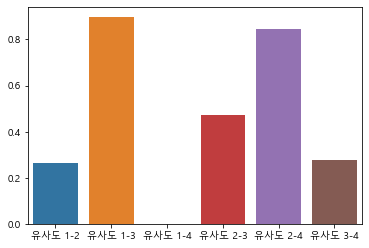

In [146]:
sns.barplot(data=cart_similar_df2)

In [91]:
# 장바구니 1번과 제일 유사도가 높은 장바구니는 3번
# 장바구니 1번에게 추천해주고 싶은 item은 양상추